<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Food Name                             1171 non-null   object 
 1   Category Name                         1171 non-null   object 
 2   Calcium                               1146 non-null   float64
 3   Calories                              1171 non-null   float64
 4   Carbs                                 1171 non-null   float64
 5   Cholesterol                           1116 non-null   float64
 6   Copper                                1092 non-null   float64
 7   Fats                                  1171 non-null   float64
 8   Fiber                                 1073 non-null   float64
 9   Folate                                1069 non-null   float64
 10  Iron                                  1151 non-null   float64
 11  Magnesium        

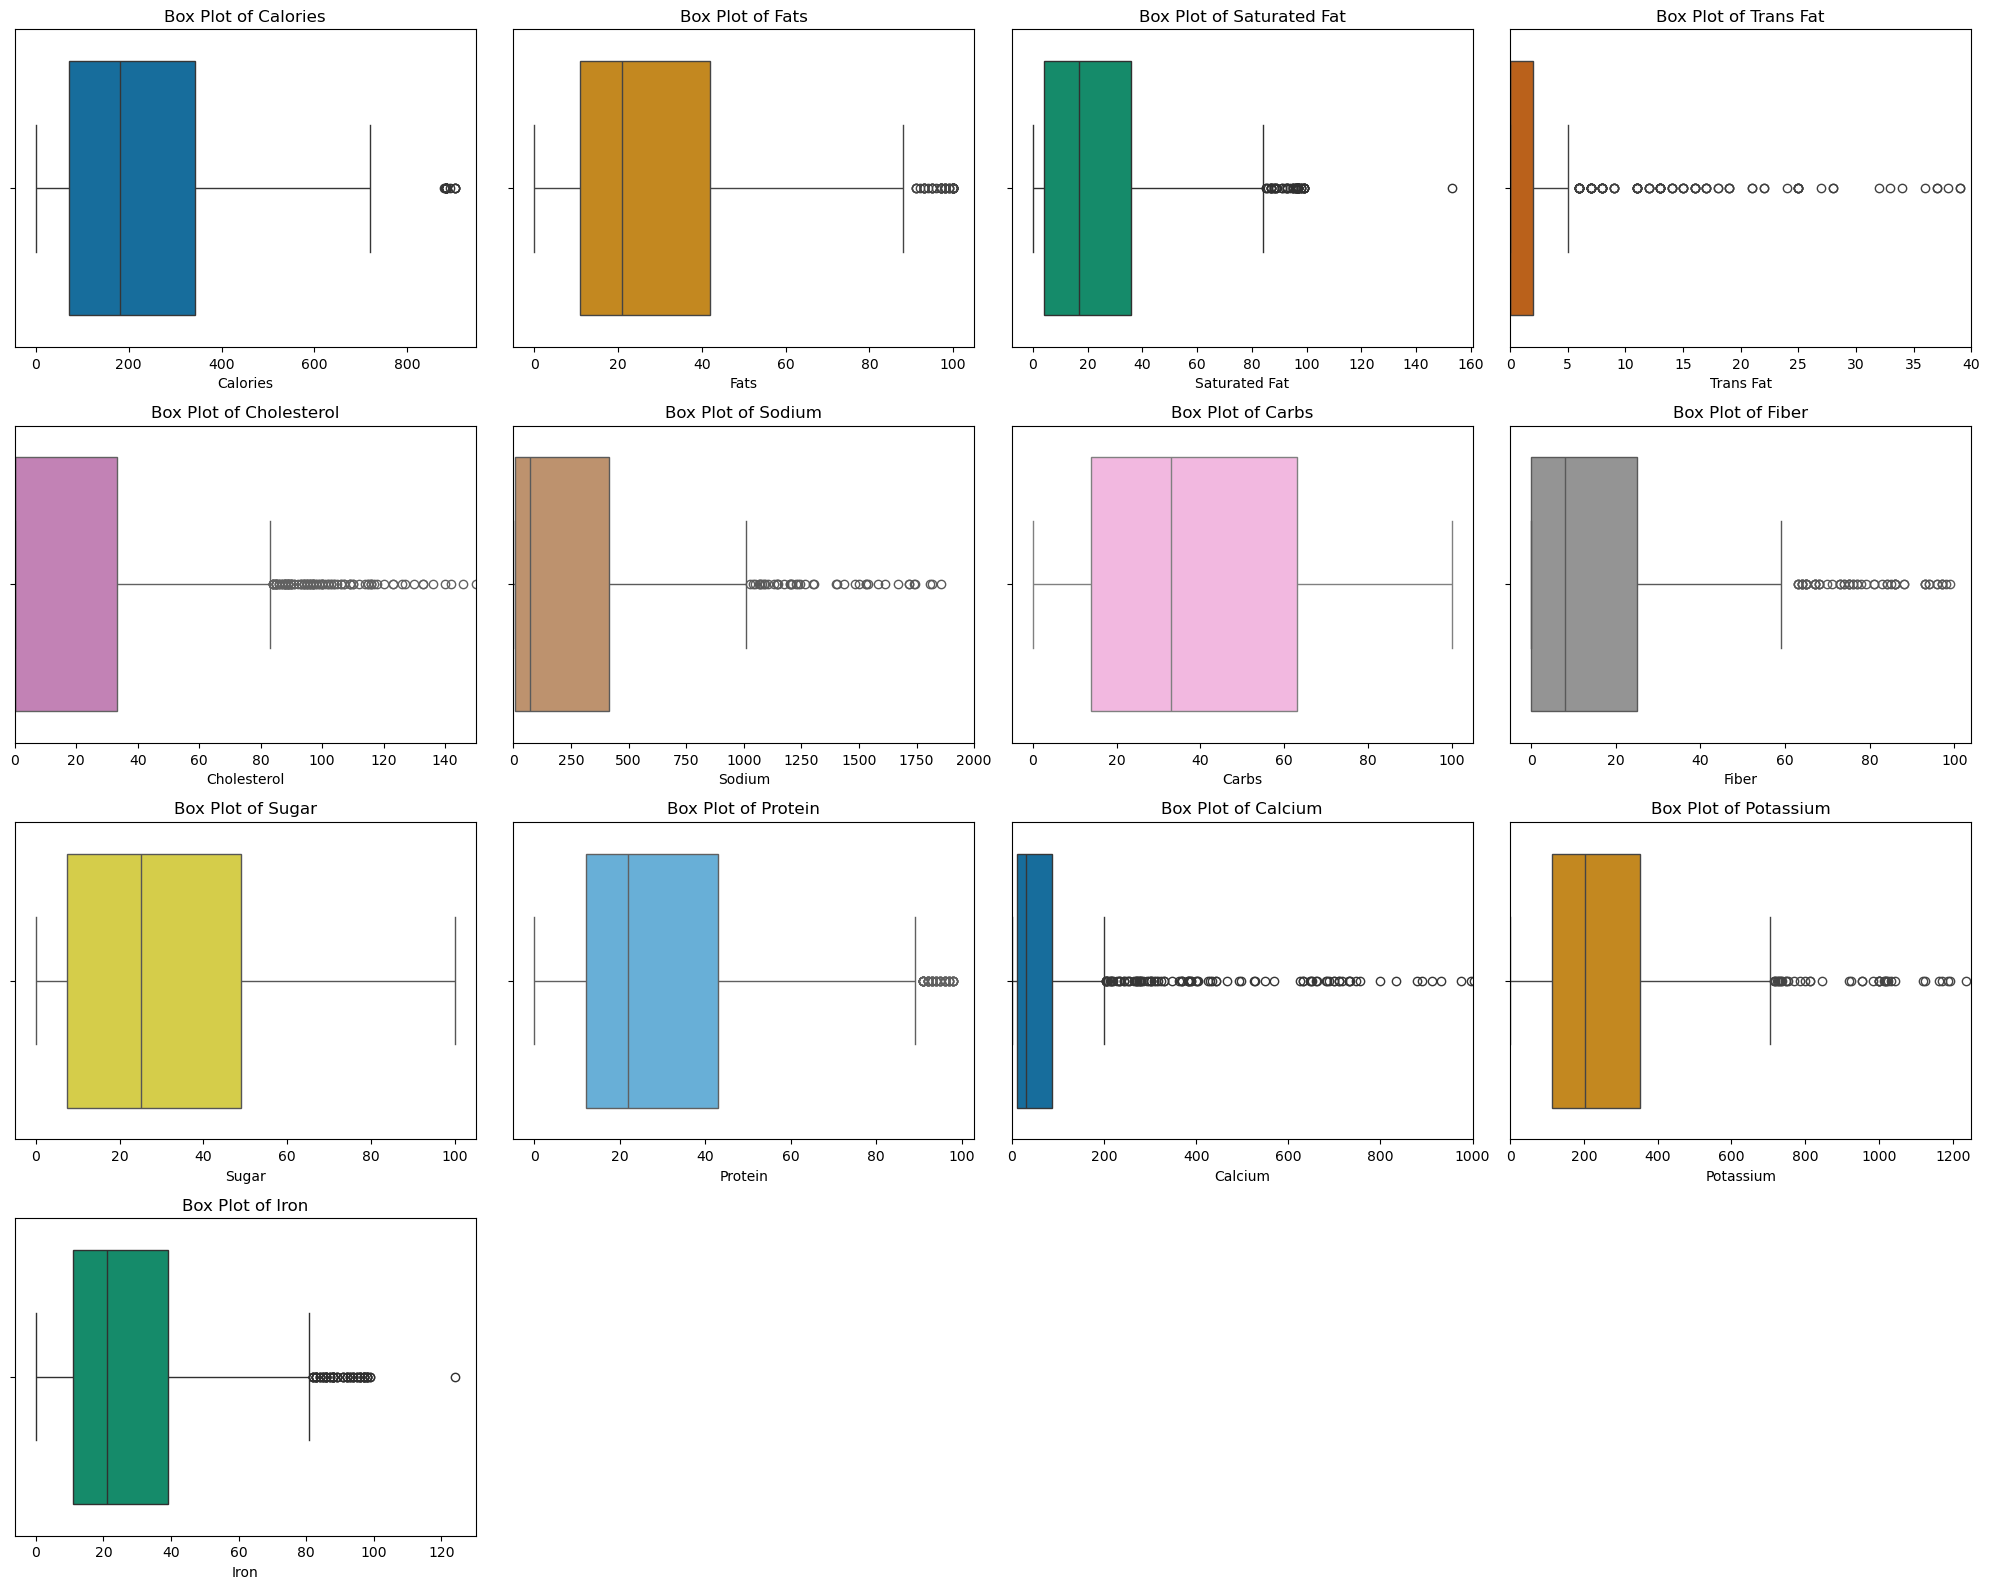

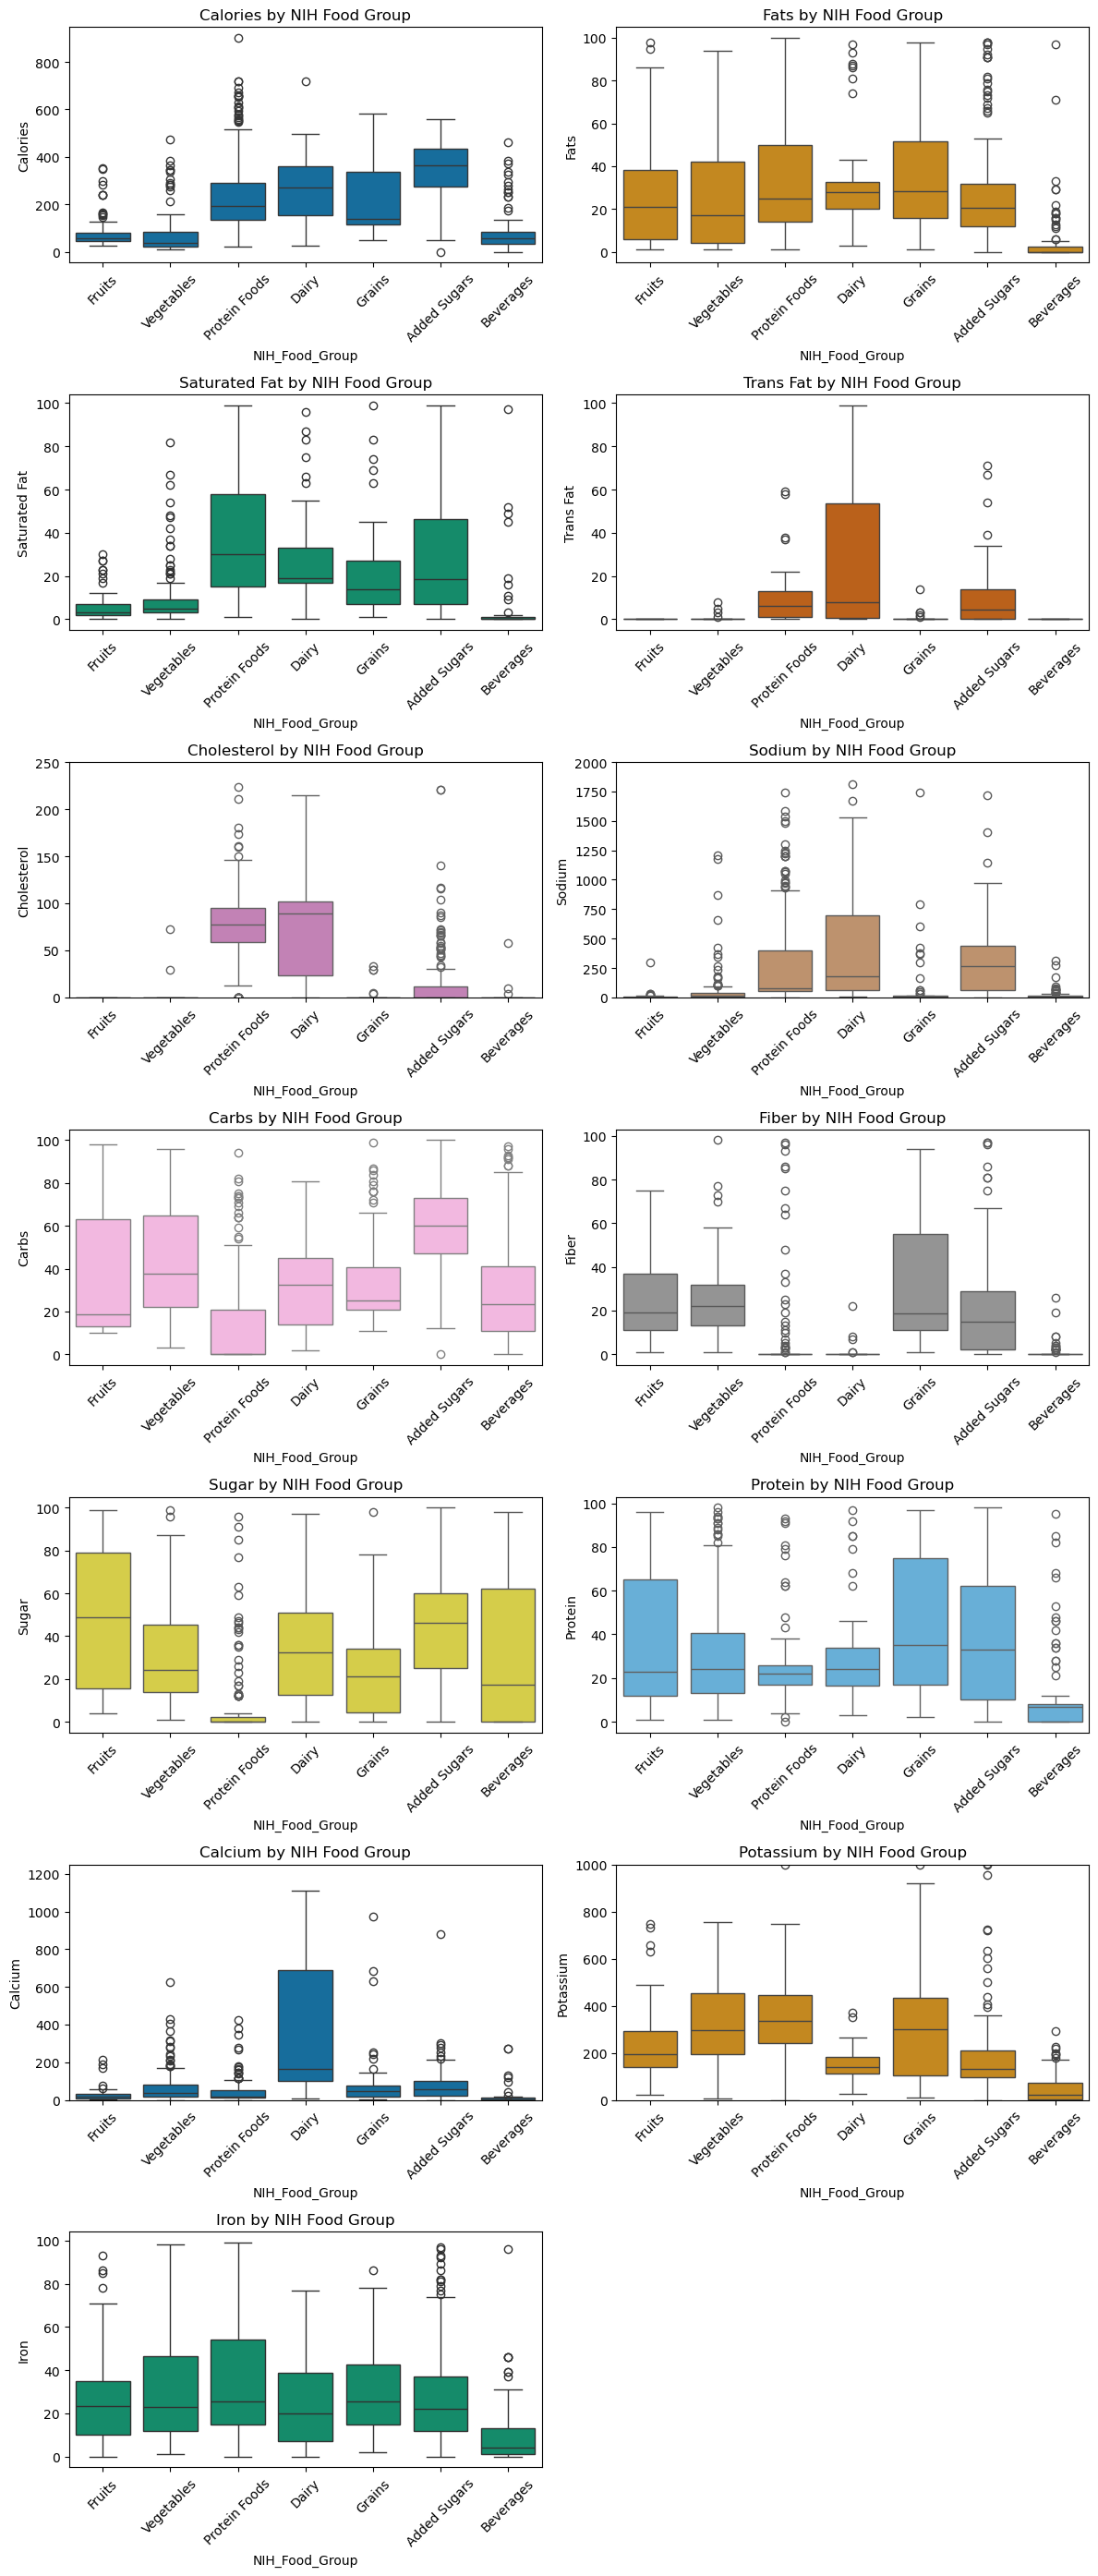


Shapiro-Wilk Test for Residuals of Calories:
Statistic: 0.9187719225883484, p-value: 3.699567713024117e-21
Residuals for Calories are not normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Residuals of Fats:
Statistic: 0.8912126421928406, p-value: 3.151329316832867e-24
Residuals for Fats are not normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Residuals of Saturated Fat:
Statistic: 0.8828750848770142, p-value: 4.867704179597317e-25
Residuals for Saturated Fat are not normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Residuals of Trans Fat:
Statistic: 0.3609050512313843, p-value: 0.0
Residuals for Trans Fat are not normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Residuals of Cholesterol:
Statistic: 0.4215245842933655, p-value: 0.0
Residuals for Cholesterol are not normally distributed (reject the null hypothesis).

Shapiro-Wilk Test for Residuals of Sodium:
Statistic: 0.4127767086029053, p

In [37]:
%run /Users/armanhundal/food_group_classification/exploratory_data_analysis.ipynb

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### Random Forest Classification Model

In [50]:
def prepare_features_and_target(data):
    # Define features and target
    X = nih_food_data[nutrients]  # Features to include in the model
    y = nih_food_data['NIH_Food_Group']  # Target variable

    # Encode the target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    return X, y_encoded, label_encoder

X, y, label_encoder = prepare_features_and_target(nih_food_data)

In [51]:
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split_data(X, y)

In [52]:
def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

rf_model = train_random_forest(X_train, y_train)

Accuracy: 74.71%

Classification Report:
                precision    recall  f1-score   support

 Added Sugars       0.70      0.93      0.80        40
    Beverages       1.00      0.88      0.94        17
        Dairy       0.88      0.41      0.56        17
       Fruits       0.73      0.48      0.58        23
       Grains       0.67      0.43      0.52        14
Protein Foods       0.82      0.90      0.86        41
   Vegetables       0.59      0.77      0.67        22

     accuracy                           0.75       174
    macro avg       0.77      0.69      0.70       174
 weighted avg       0.76      0.75      0.73       174



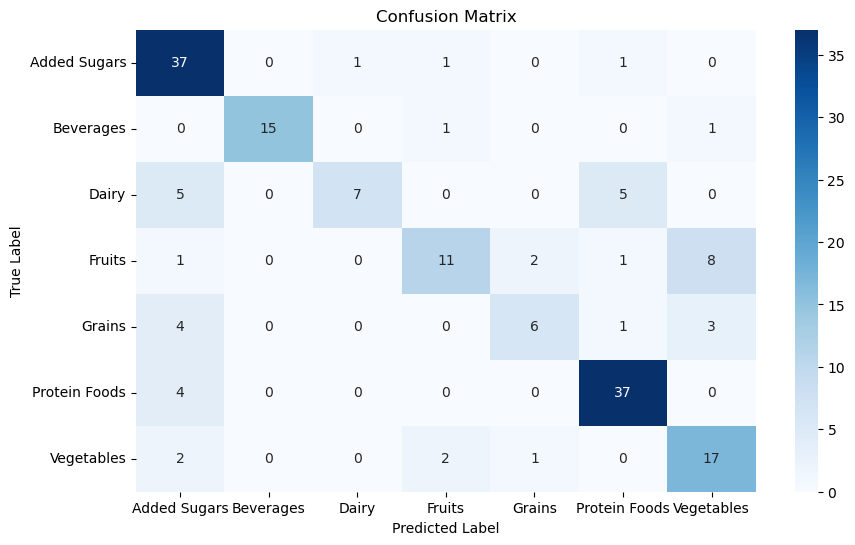

In [53]:
def evaluate_model(model, X_test, y_test, label_encoder):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Generate the classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

evaluate_model(rf_model, X_test, y_test, label_encoder)

In [54]:
def cross_validate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}% ± {np.std(cv_scores) * 100:.2f}%")

cross_validate_model(rf_model, X, y)

Cross-Validation Accuracy: 75.98% ± 9.60%


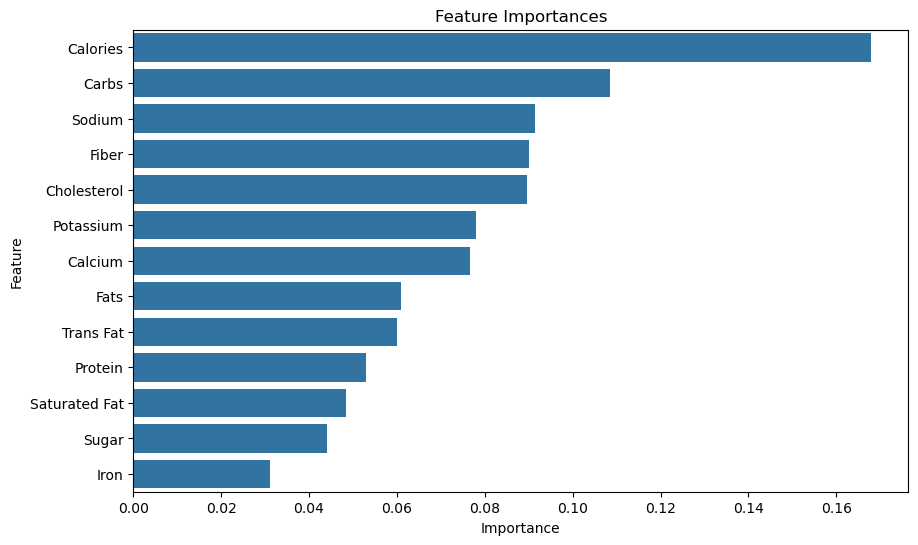

In [55]:
def plot_feature_importance(model, feature_names):
    # Get feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame for better visualization
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort and plot feature importances
    features_df = features_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=features_df)
    plt.title('Feature Importances')
    plt.show()

plot_feature_importance(rf_model, X.columns)

### XGBoost Classification Model

In [59]:
X, y, label_encoder = prepare_features_and_target(nih_food_data)

X_train, X_test, y_train, y_test = split_data(X, y)

def train_xgb_model(X_train, y_train):
    xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    xgb_model.fit(X_train, y_train)
    return xgb_model

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

# Classification Report for XGBoost
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Generate confusion matrices for Random Forest and XGBoost
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

XGBoost Accuracy: 74.71%

XGBoost Classification Report:
                precision    recall  f1-score   support

 Added Sugars       0.75      0.95      0.84        40
    Beverages       0.87      0.76      0.81        17
        Dairy       0.92      0.65      0.76        17
       Fruits       0.80      0.35      0.48        23
       Grains       0.42      0.36      0.38        14
Protein Foods       0.86      0.90      0.88        41
   Vegetables       0.58      0.82      0.68        22

     accuracy                           0.75       174
    macro avg       0.74      0.68      0.69       174
 weighted avg       0.76      0.75      0.73       174



In [62]:
cross_validate_model(xgb_model, X, y)

Cross-Validation Accuracy: 74.25% ± 9.72%


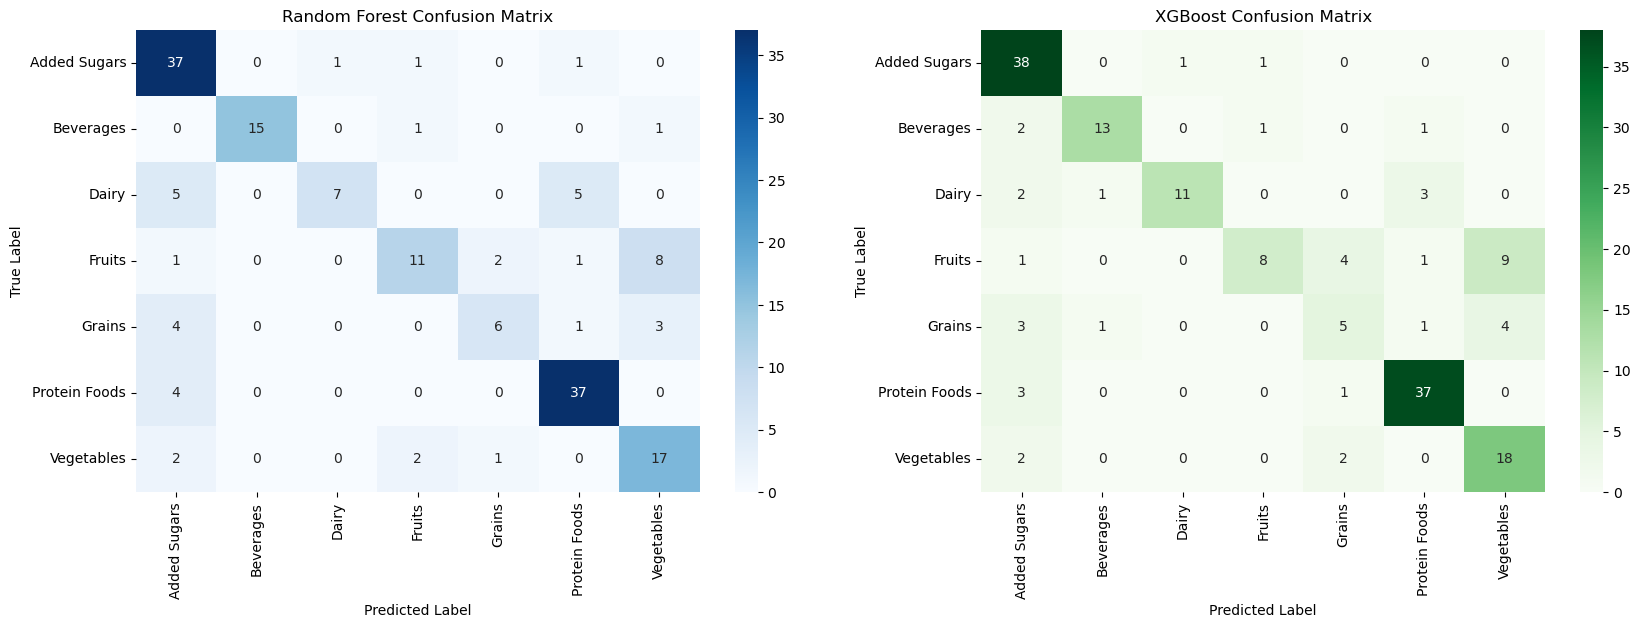

In [63]:
# Plot confusion matrices for Random Forest and XGBoost
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

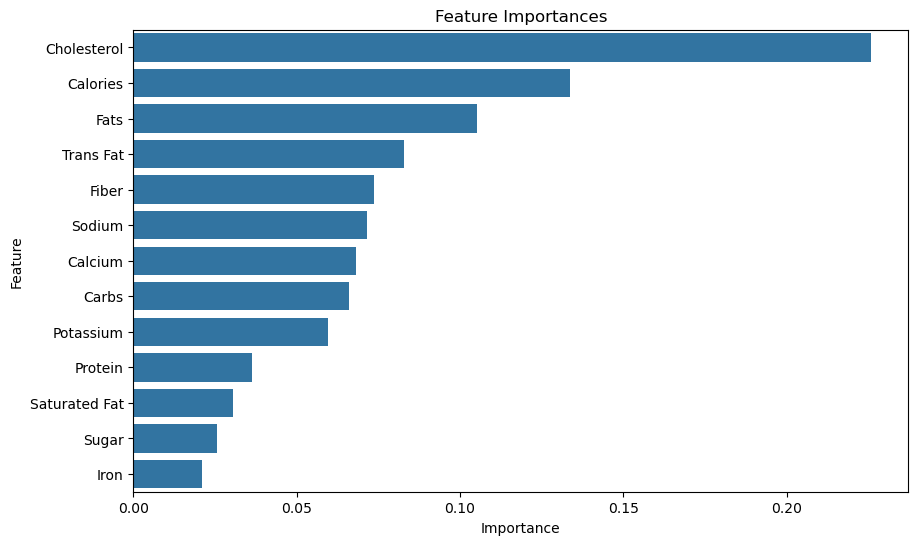

In [67]:
plot_feature_importance(xgb_model, X.columns)